In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

In [ ]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [ ]:
df = pd.read_json('pretty_jp_tweets_complaint.json')
#sample = pd.read_csv('TwitterData.csv')



,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,
1,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",0,NurseRabbi,Banks not compliant! @JPMorgan_UK chase! No ex...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-12 18:11:16,2018-08-12 18:11:16,1028705490887421952,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],0,andthatrhymeswi,The US foolishly levied tariffs on art in the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-10 13:57:15,2018-08-10 13:57:15,1027916790314229760,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,
3,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],0,NeedaHobby1,2013: JP Morgan Chase reached a record settlem...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-29 20:06:39,2018-07-29 20:06:39,1023661100913459200,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,
4,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,[Healthcare],[],False,False,8,[],,0,[],3,darin_brannan,"Next week, I'll be presenting at the @jpmorgan...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-09 17:32:10,2020-01-09 17:32:10,1215325404048904192,/darin_brannan/status/1215325404048904192,1009581258,Darin Brannan,
513,False,[],[],True,True,1,[],1096414839898030080,2,"[{'screen_name': 'JoAnnKennedyCAN', 'user_id':...",0,tonimccrary,"file a complaint on Roos, read","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-08 12:03:47,2020-01-08 12:03:47,1214880376319086592,/tonimccrary/status/1214880376319086594,114508810,toni mccrary,
514,False,[],[],False,False,1,[],,0,[],0,CartoonessToo,I just sent a formal complaint about @jpmorgan...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-07 21:59:02,2020-01-07 21:59:02,1214667789018943488,/CartoonessToo/status/1214667789018943488,1020607197787508736,"Evicted Cartoonist, LA Times - Go outside!",
515,False,[],[],False,False,0,[http://bit.ly/37F0O4x],,0,[],0,usdcedny,"Logerfo v. JPMorgan Chase Bank, National Assoc...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-06 19:55:03,2020-01-06 19:55:03,1214274196869697536,/usdcedny/status/1214274196869697540,146258829,USDC EDNY Filings,


In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

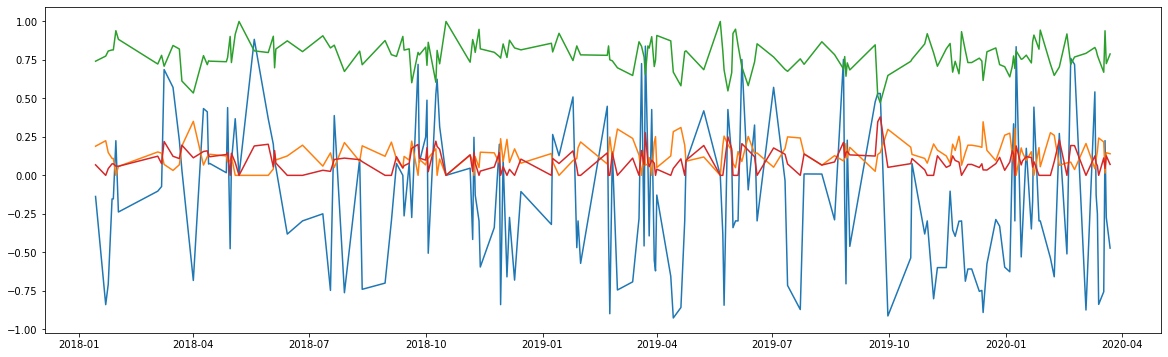

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [ ]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'In the Employment Racial Discrimination & #Retaliation #lawsuit - Lue v. JPMorgan Chase & Co. et al, I’m not the kind of person 2 go & find #racism under a rock but if it is blatant, I will #TakeAStance.\nSee the opening paragraph of my Complaint 2 the #EEOC against #JPMorganChasepic.twitter.com/34C8pAsT7u'

In [ ]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'In the Employment Racial Discrimination & #Retaliation #lawsuit - Lue v. JPMorgan Chase & Co. et al, I’m not the kind of person 2 go & find #racism under a rock but if it is blatant, I will #TakeAStance.\nSee the opening paragraph of my Complaint 2 the #EEOC against #JPMorganChasepic.twitter.com/34C8pAsT7u'

Text(0, 0.5, 'Sentiment')

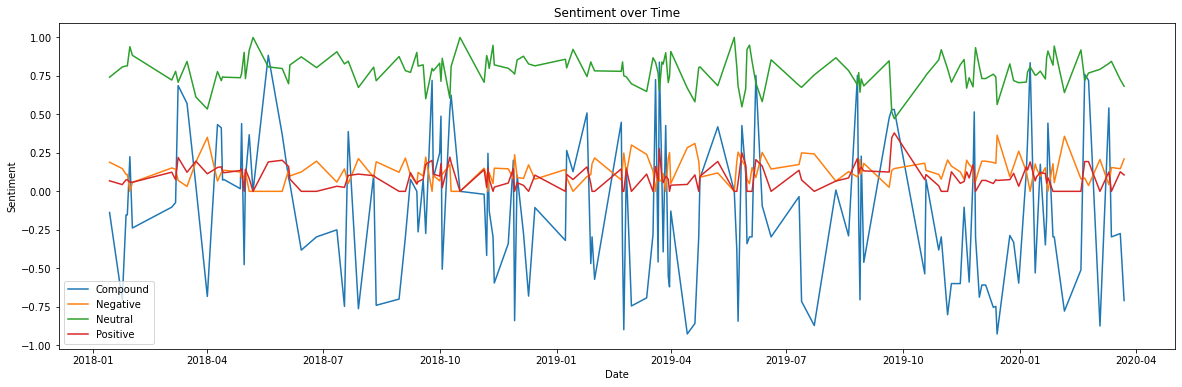

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

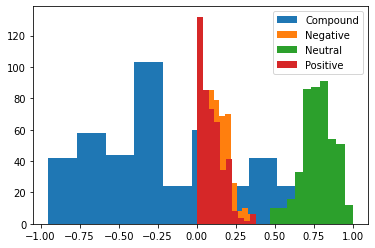

In [ ]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

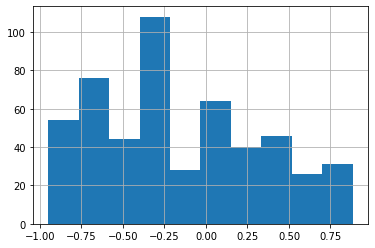

In [ ]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.876,0.000,-0.7003
1,0.719,0.089,-0.7405
2,0.807,0.102,0.1049
3,0.675,0.112,-0.7627
4,0.876,0.000,-0.7003
...,...,...,...
512,0.809,0.191,0.8360
513,0.694,0.000,-0.2960
514,0.776,0.139,0.3348
515,0.710,0.160,0.1280


In [56]:
#Importing Various twitter data
# all JP files
#Complaint
df_= pd.read_json('pretty_jp_tweets_complaint.json')


In [57]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [58]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [59]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(517, 170)


In [60]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [61]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [62]:
sentiment_wm = df_['text'].apply(lambda x: analyzer.polarity_scores(x))
df_ = pd.concat([df_, sentiment_wm.apply(pd.Series)],1)

In [63]:
df_.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,0.124,0.876,0.000,-0.7003
1,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",0,NurseRabbi,Banks not compliant! @JPMorgan_UK chase! No ex...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-12 18:11:16,2018-08-12 18:11:16,1028705490887421952,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,0.192,0.719,0.089,-0.7405
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],0,andthatrhymeswi,The US foolishly levied tariffs on art in the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-10 13:57:15,2018-08-10 13:57:15,1027916790314229760,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,0.091,0.807,0.102,0.1049
3,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],0,NeedaHobby1,2013: JP Morgan Chase reached a record settlem...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-29 20:06:39,2018-07-29 20:06:39,1023661100913459200,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,0.213,0.675,0.112,-0.7627
4,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,0.124,0.876,0.000,-0.7003


In [64]:
df__pos = df_[df_['compound'] >= 0.05]
df__neg = df_[df_['compound'] <= -0.05]
df__neu = df_[( df_['compound'] < 0.05 ) & ( df_['compound'] > -0.05 )]


In [65]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.020002  0.053938       1        1  17.466575
7      0.184664  0.058542       2        1  17.128081
3     -0.269981  0.023777       3        1  11.911814
9     -0.209274 -0.000165       4        1   9.638256
5      0.107462  0.078253       5        1   9.440134
4      0.180733  0.189077       6        1   8.913284
2     -0.179246 -0.030151       7        1   8.274641
0      0.141338 -0.247622       8        1   6.692877
8     -0.057656  0.005622       9        1   5.308703
6      0.121962 -0.131271      10        1   5.225635, topic_info=         Term       Freq      Total Category  logprob  loglift
11  compliant  25.000000  25.000000  Default  30.0000  30.0000
10    company   9.000000   9.000000  Default  29.0000  29.0000
33      money   8.000000   8.000000  Default  28.0000  28.0000
18       file   7.000000   7.000000  Default  27.0000  27.0000
24       http  14.000000  14.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
24       http   0.118442  14.868913  Topic10  -5.1139  -1.8810
2        bank   0.118439  16.023049  Topic10  -5.1140  -1.9558
11  compliant   0.118439  25.612872  Topic10  -5.1140  -2.4249
19      filed   0.118439   7.748846  Topic10  -5.1140  -1.2293
38       tell   0.118439   7.979370  Topic10  -5.1140  -1.2586

[420 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         2  0.821482   action
1         1  0.244101  alleges
1         2  0.488203  alleges
2         1  0.062410     bank
2         2  0.249640     bank
...     ...       ...      ...
40        9  0.066320  twitter
41        2  0.625990   united
42        2  0.727767     week
42        8  0.242589     week
43        1  0.962169      www

[109 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 4, 10, 6, 5, 3, 1, 9, 7])

In [66]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.132598  0.115290       1        1  14.128578
8      0.114770  0.114524       2        1  13.138761
0      0.032215 -0.020270       3        1  12.676970
1      0.049181 -0.055043       4        1  11.623627
5      0.161274 -0.202374       5        1  10.475136
4     -0.076657  0.028426       6        1   9.531848
2     -0.238289 -0.184908       7        1   8.471632
9     -0.114659  0.177128       8        1   7.122906
7     -0.199839  0.052476       9        1   6.995203
3      0.139406 -0.025250      10        1   5.835337, topic_info=         Term       Freq      Total Category  logprob  loglift
18  compliant   9.000000   9.000000  Default  30.0000  30.0000
19      court  13.000000  13.000000  Default  29.0000  29.0000
36       file  14.000000  14.000000  Default  28.0000  28.0000
37      filed  13.000000  13.000000  Default  27.0000  27.0000
60     morgan  23.000000  23.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
7         bit   0.103330  13.028197  Topic10  -6.0358  -1.9957
45       http   0.103329  17.537056  Topic10  -6.0358  -2.2929
42       gets   0.103328   5.067902  Topic10  -6.0358  -1.0515
13       case   0.103328   6.985189  Topic10  -6.0358  -1.3724
71      phone   0.103328   6.956008  Topic10  -6.0358  -1.3682

[407 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         7  0.647316  accounts
0         9  0.323658  accounts
1         5  0.159246       act
1        10  0.636985       act
2         3  0.215205      acts
...     ...       ...       ...
92        1  0.527128       www
92        2  0.105426       www
92        6  0.316277       www
93        1  0.242721      york
93        6  0.728162      york

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 1, 2, 6, 5, 3, 10, 8, 4])

In [67]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


ValueError: ignored

In [68]:
print(df__pos.shape)
print(df__neg.shape)
print(df__neu.shape)

(186, 25)
(310, 25)
(21, 25)
